***STEPS FOR QUERYING STRUCTURAL VARIANT VCF FILE, GETTING THE INTERSECT WITH GOOD PLOTS, AND PLOTTING THE PCA***

Query the Smoove .vcf file for all SV calls with alternate genotypes

In [16]:
#%%bash
#VCF=sparrow_all.smoove.square.vcf.gz

#bcftools query -f '%CHROM\t%POS\t%END\t%ALT[\t%GT]\n' ${VCF} | sort -k1,1 -k2,2n | grep CM | grep -v '\[' | grep -v '\]' | sed 's/<DEL>/DEL/g' | sed 's/<DUP>/DUP/g' | sed 's/<INV>/INV/g' > SV_altgenos.bed

STEP 1 - filter out only the Good calls in the report:

Filter for number of SVs in report by desired person, reorganize columns for order chrom, start pos,stop pos, SV type:

***Filter for Yes's for each of the four curators***

First set the file names and curator names as variables

Then extract all Yes's from the raw report

In [13]:
%%bash
RAWDEL=raw_report_del_dec23_2020.tsv
CUR1=gabriel
CUR2=alicia
CUR3=erik
CUR4=hamish
#set the SV class
SV=DEL

#Extract all Yes's
cat ${RAWDEL} | grep "${CUR1}" | grep "Yes"| sed '1,3d' > yes_${SV}_${CUR1}.tsv
cat ${RAWDEL} | grep "${CUR2}" | grep "Yes"| sed '1,3d' > yes_${SV}_${CUR2}.tsv
cat ${RAWDEL} | grep "${CUR3}" | grep "Yes"| sed '1,3d' > yes_${SV}_${CUR3}.tsv
cat ${RAWDEL} | grep "${CUR4}" | grep "Yes"| sed '1,3d' > yes_${SV}_${CUR4}.tsv

Process the .bed file to extract genotype information for each SV call

In [14]:
%%bash
#set the SV class
SV=DEL
CUR1=gabriel
CUR2=alicia
CUR3=erik
CUR4=hamish

cat yes_${SV}_${CUR1}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yes_${SV}_${CUR1}_processed.bed 
cat yes_${SV}_${CUR2}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yes_${SV}_${CUR2}_processed.bed 
cat yes_${SV}_${CUR3}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yes_${SV}_${CUR3}_processed.bed 
cat yes_${SV}_${CUR4}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yes_${SV}_${CUR4}_processed.bed 

First take intersect off all four curators' validated SVs

In [15]:
%%bash 
#set the SV class
SV=DEL
CUR1=gabriel
CUR2=alicia
CUR3=erik
CUR4=hamish


bedops --intersect yes_${SV}_${CUR1}_processed.bed yes_${SV}_${CUR2}_processed.bed yes_${SV}_${CUR3}_processed.bed yes_${SV}_${CUR4}_processed.bed  > yesallintersect.bed

Now intersect with .bed file extracted from original Smoove .vcf file

In [5]:
#%%bash 
#set the SV class
#SV=DEL
#CUR1=gabriel
#CUR2=alicia
#CUR3=erik
#CUR4=hamish

#bedtools intersect -f 0.9 -r -a SV_altgenos.bed -b yesallintersect.bed  > yesallintersect.txt

***Change format of intersected bedfile, repeat this to join 3 first columns with tabs***

In [12]:
cat yesallintersect.txt | sed 's/0\/0/0/g' | sed 's/0\/1/1/g' | sed 's/1\/1/2/g'| sed 's/.\/\./0/g' | sed -e 's/[\t ]\+/_/' | sed -e 's/[\t ]\+/_/' | sed -e 's/[\t ]\+/_/' > yesallintersect_edit.txt 

***Convert to .csv for export to Python, to tranpose matrix***

In [10]:
cat yesallintersect_edit.txt | sed 's/\t/,/'g > yesallintersect_edit.csv

In [11]:
import numpy as np
import pandas as pd

df = pd.read_csv("yesallintersect_edit.csv", header = None, index_col = None)

df_T = df.transpose()

df_T.to_csv("yesallintersect_T.csv", index = False)

EmptyDataError: No columns to parse from file

Remove first line

In [9]:
%%bash
sed -i -e 1,1d yesallintersect_T.csv 

***Now plot in Python!***

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [10]:
#df = pd.read_csv("rejecteddels_all_T.csv")
df = pd.read_csv("yesallintersect_T.csv")
hs = pd.read_csv("HS.sample.csv")
df

,CM004525.1_450632_450686_DEL,CM004525.1_2793450_2793535_DEL,CM004525.1_3367262_3367328_DEL,CM004525.1_5558809_5559097_DEL,CM004525.1_7403900_7405237_DEL,CM004525.1_7522591_7522670_DEL,CM004525.1_9075437_9075557_DEL,CM004525.1_9813191_9813303_DEL,CM004525.1_10956079_10956149_DEL,CM004525.1_11653151_11653211_DEL,...,CM004549.1_2440750_2440870_DEL,CM004550.1_246509_247134_DEL,CM004550.1_1236277_1236348_DEL,CM004550.1_1890650_1890710_DEL,CM004550.1_3727001_3727053_DEL,CM004550.1_4313941_4314149_DEL,CM004552.1_1630829_1630907_DEL,CM004553.1_2614567_2614634_DEL,CM004553.1_2844948_2845034_DEL,CM004554.1_868673_869052_DEL
0,0,2,2,2,1,1,0,2,0,1,...,2,1,1,0,0,1,1,0,0,1
1,0,1,0,0,1,2,1,1,0,2,...,1,2,0,0,0,1,0,2,0,0
2,0,0,0,1,1,2,0,1,1,2,...,0,0,0,0,1,2,0,2,0,0
3,1,0,0,0,1,0,0,0,0,2,...,2,0,0,0,2,1,0,2,0,0
4,0,1,2,1,0,0,0,0,1,1,...,0,0,0,0,1,2,1,0,1,1
5,2,0,2,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,2,2
6,0,0,2,1,0,0,0,1,0,2,...,0,0,0,0,0,0,0,2,0,1
7,1,0,1,1,1,2,1,1,0,0,...,1,0,0,0,0,2,1,2,2,0
8,0,1,2,1,1,2,1,0,1,0,...,2,1,1,0,0,2,0,2,0,1
9,2,2,0,1,0,0,0,2,0,1,...,0,2,0,1,2,0,0,0,2,0


In [11]:
import plotly.express as px
from sklearn.decomposition import PCA

X = df


In [12]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

components 

array([[-2.38164415e+00, -9.79222094e-01],
       [-2.84023225e+00,  1.21831555e-01],
       [ 2.44378413e-01,  1.31873268e+00],
       [-1.26245884e+00,  1.36252900e+00],
       [-7.03391164e-03, -2.79021492e+00],
       [-2.64490861e+00, -4.91314802e+00],
       [-2.02093427e+00, -6.55036059e-01],
       [-6.68426216e+00,  1.40452485e+01],
       [-7.57939837e+00,  1.46159699e+01],
       [-3.61587050e+00, -1.72861678e+00],
       [-3.70620437e+00, -2.46831899e+00],
       [ 1.68967765e+01,  6.07691886e+00],
       [ 3.46950175e-01, -1.37295948e+00],
       [ 2.41275737e+00, -5.73834476e+00],
       [ 1.32165503e+01,  6.28377071e-01],
       [-2.26645855e+00, -3.78007067e+00],
       [-1.19824471e+00, -1.54611743e+00],
       [-4.64830330e+00, -3.14732175e+00],
       [-2.42181340e+00, -2.97571293e+00],
       [ 1.91393209e+00, -5.87866285e+00],
       [ 1.17935043e+01,  2.96226721e+00],
       [-6.97494268e-01, -7.34116545e+00],
       [ 2.56121618e-01, -8.99285676e+00],
       [ 7.

In [13]:
pcomp = pd.DataFrame(components)

merged = pd.concat([pcomp, hs], axis=1)

merged['popinfo']
PC1 = merged.iloc[:, 0]
PC2 = merged.iloc[:, 1]

merged_n = merged.rename(columns={0: 'PC1'})
merged_new = merged_n.rename(columns={1: 'PC2'})

merged2 =  merged_new.rename(columns={'popinfo': 'populations'})

In [14]:
merged2

,PC1,PC2,populations
0,-2.381644,-0.979222,ALTA
1,-2.840232,0.121832,ALTA
2,0.244378,1.318733,HELG
3,-1.262459,1.362529,TRON
4,-0.007034,-2.790215,TRON
5,-2.644909,-4.913148,TRON
6,-2.020934,-0.655036,HELG
7,-6.684262,14.045248,PASV
8,-7.579398,14.615970,PASV
9,-3.615870,-1.728617,TRON


In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

	
# Set theme
sns.set_style('darkgrid')

colours = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#EE99AC',  # Fairy
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
	

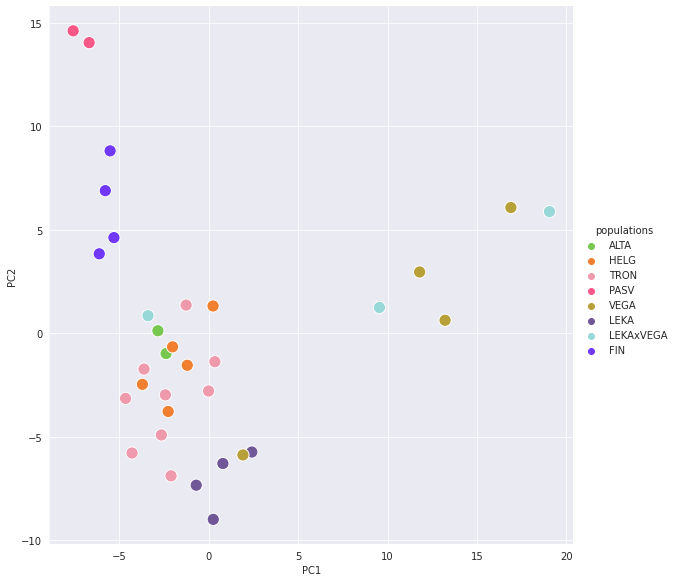

In [16]:
from matplotlib import pyplot
import seaborn


sns.relplot(x="PC1", y="PC2", data=merged2, hue="populations", palette=colours, s=(150),height=8, aspect=1)